In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:43<00:00, 27.1MB/s]
100% 1.06G/1.06G [00:43<00:00, 26.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [16]:
#generators(Divides data into small batches, used for large amount of  data )
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize (Because above value stores in numpy array and its value stores from 0-255,so we have to change it to 0-1)
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model
#using 3 filters- 32,64,128

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 117ms/step - loss: 0.6158 - accuracy: 0.6489 - val_loss: 0.5257 - val_accuracy: 0.7314
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4733 - accuracy: 0.7743 - val_loss: 0.4683 - val_accuracy: 0.7778
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3794 - accuracy: 0.8283 - val_loss: 0.4366 - val_accuracy: 0.7994
Epoch 4/10
625/625 [==============================] - 59s 93ms/step - loss: 0.2750 - accuracy: 0.8801 - val_loss: 0.5608 - val_accuracy: 0.7962
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1719 - accuracy: 0.9287 - val_loss: 0.6843 - val_accuracy: 0.7806
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 0.1149 - accuracy: 0.9567 - val_loss: 0.8508 - val_accuracy: 0.7984
Epoch 7/10
625/625 [==============================] - 57s 90ms/step - loss: 0.0770 - accuracy: 0.9733 - val_loss: 1.0145 - val_accuracy

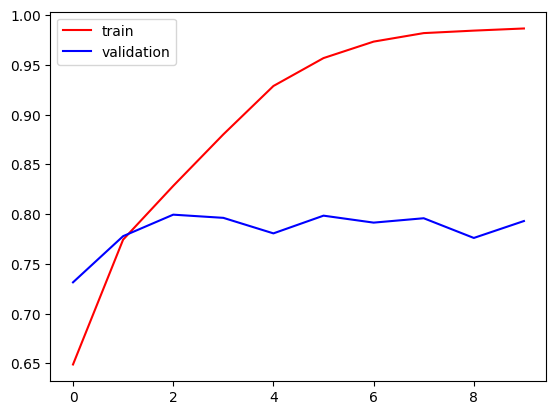

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

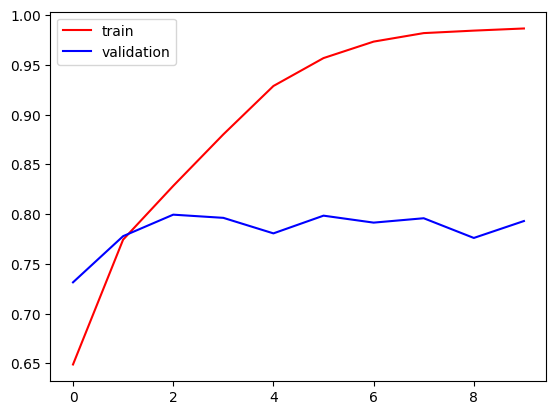

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


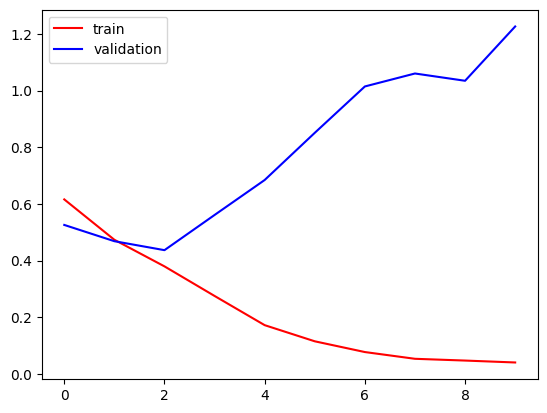

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

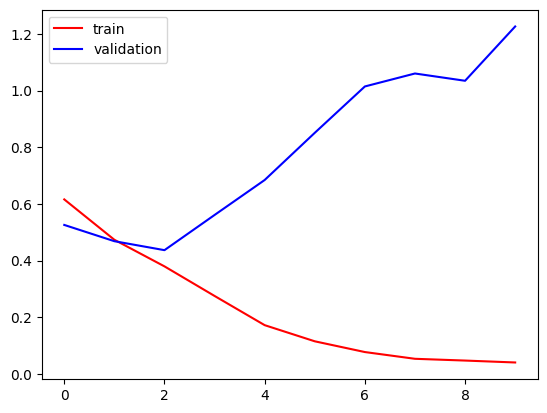

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting
#1. Data Augmentation
#2. Dropout
#3. Batch Normalization
#4. Add more data
#5. Reduce complexity of model
#6.L1/L2 Regularizer